Este modelo es de trabajo Static Peruvian Sign Language Classifier Based on Manual Spelling Using a Convolutional Neural Network de los autores Gerardo Portocarrero-Banda1, Eveling Gloria Castro-Gutierrez, Abdel Alejandro Portocarrero-Banda, Claudia Acra-Despradel, David Rondon, Hugo Guillermo Jimenez-Pacheco and Miguel Angel Ortiz-Esparza. 
El trabajo se puede encontrar en el siguiente link: https://ceur-ws.org/Vol-3693/paper17.pdf

La arquitectura de este modelo es el siguiente:

- Objetivo: reconocer alfabetos estáticos de la Lengua de Señas Peruana (PSL) mediante clasificación multiclase (25 clases), generando probabilidades con Softmax en la capa de salida.  

- Arquitectura de la red:  
    - 4 capas convolucionales (Conv2D):  
        - 32 filtros, kernel 3×3, activación ReLU.  
        - 64 filtros, kernel 3×3, activación ReLU.  
        - 128 filtros, kernel 3×3, activación ReLU.  
        - 256 filtros, kernel 3×3, activación ReLU.  
    - 4 capas de MaxPooling2D (2×2), una después de cada convolución.  
    - Dropout (30%) tras la última capa convolucional.  
    - Flatten layer para convertir mapas de características en un vector.  
    - Red totalmente conectada (DNN):  
        - Dense(256) → ReLU.  
        - Dense(128) → ReLU.  
        - Dense(64) → ReLU.  
        - Dense(32) → ReLU.  
    - Dropout (30%) tras las capas ocultas.  
    - Capa de salida: Dense(25) → Softmax.  

- Configuración de entrenamiento:  
    - Función de pérdida: categorical_crossentropy.  
    - Optimizador: Adam con learning_rate=0.001.  
    - Métrica principal: accuracy.  
    - Callbacks:  
        - ModelCheckpoint para guardar el mejor modelo.  
        - EarlyStopping para detener el entrenamiento si no mejora la validación.  

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

def build_cnn(input_shape=(128, 128, 3), num_classes=24, lr=0.001):
    model = Sequential()

    # Convolutional Layers
    model.add(Conv2D(32, (3,3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2,2)))

    model.add(Conv2D(64, (3,3), activation='relu'))
    model.add(MaxPooling2D((2,2)))

    model.add(Conv2D(128, (3,3), activation='relu'))
    model.add(MaxPooling2D((2,2)))

    model.add(Conv2D(256, (3,3), activation='relu'))
    model.add(MaxPooling2D((2,2)))

    model.add(Dropout(0.3))

    model.add(Flatten())

    # Fully Connected Layers
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))

    # Dropout
    model.add(Dropout(0.3))

    # Output Layer
    model.add(Dense(num_classes, activation='softmax'))

    # Compilación
    optimizer = Adam(learning_rate=lr)
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [21]:

model = build_cnn(input_shape=(224,224,3), num_classes=24, lr=0.001)
model.summary()

c:\Users\sebas\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │     9,437,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 24)             │           792 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,869,880 (37.65 MB)

 Trainable params: 9,869,880 (37.65 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
import numpy as np
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

def load_dataset(dataset_path, img_size=224):
    X = []
    y = []
    class_names = sorted(os.listdir(dataset_path))
    class_indices = {cls: i for i, cls in enumerate(class_names)}

    for cls in class_names:
        class_dir = os.path.join(dataset_path, cls)
        if not os.path.isdir(class_dir):
            continue
        for file in os.listdir(class_dir):
            if file.endswith(".npy"):
                path = os.path.join(class_dir, file)
                img = np.load(path) 
                X.append(img)
                y.append(class_indices[cls])

    X = np.array(X)
    y = np.array(y)

    print(f"Dataset cargado: {X.shape[0]} imágenes, {len(class_names)} clases")
    return X, y, class_names

In [23]:
DATASET_PATH = "CreateDataSets\datasets\Static-Hand-Gestures-Alphabet-ThinkName"
X, y, class_names = load_dataset(DATASET_PATH, img_size=224)

Dataset cargado: 3600 imágenes, 24 clases


In [24]:
y = to_categorical(y, num_classes=len(class_names))

In [25]:
# Dividir dataset en entrenamiento (70%), validación (15%) y test (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print("Train:", X_train.shape, y_train.shape)
print("Val:", X_val.shape, y_val.shape)
print("Test:", X_test.shape, y_test.shape)

Train: (2520, 224, 224, 3) (2520, 24)
Val: (540, 224, 224, 3) (540, 24)
Test: (540, 224, 224, 3) (540, 24)


In [26]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("best_model.h5", monitor='val_accuracy', save_best_only=True, verbose=1)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[checkpoint]
)


Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step - accuracy: 0.0391 - loss: 3.1784
Epoch 1: val_accuracy improved from -inf to 0.04074, saving model to best_model.h5


79/79 ━━━━━━━━━━━━━━━━━━━━ 46s 536ms/step - accuracy: 0.0391 - loss: 3.1784 - val_accuracy: 0.0407 - val_loss: 3.1781
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step - accuracy: 0.0274 - loss: 3.1782
Epoch 2: val_accuracy improved from 0.04074 to 0.04259, saving model to best_model.h5


79/79 ━━━━━━━━━━━━━━━━━━━━ 38s 474ms/step - accuracy: 0.0274 - loss: 3.1782 - val_accuracy: 0.0426 - val_loss: 3.1781
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step - accuracy: 0.0369 - loss: 3.1782
Epoch 3: val_accuracy did not improve from 0.04259
79/79 ━━━━━━━━━━━━━━━━━━━━ 38s 474ms/step - accuracy: 0.0368 - loss: 3.1782 - val_accuracy: 0.0407 - val_loss: 3.1781
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step - accuracy: 0.0406 - loss: 3.1782
Epoch 4: val_accuracy did not improve from 0.04259
79/79 ━━━━━━━━━━━━━━━━━━━━ 36s 453ms/step - accuracy: 0.0406 - loss: 3.1782 - val_accuracy: 0.0426 - val_loss: 3.1781
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step - accuracy: 0.0430 - loss: 3.1783
Epoch 5: val_accuracy did not improve from 0.04259
79/79 ━━━━━━━━━━━━━━━━━━━━ 37s 465ms/step - accuracy: 0.0430 - loss: 3.1783 - val_accuracy: 0.0407 - val_loss: 3.1781
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step - accuracy: 0.0462 - loss: 3.1781
Epoch 6: val_accuracy did not i

In [27]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {acc*100:.2f}%")

Test Accuracy: 4.07%


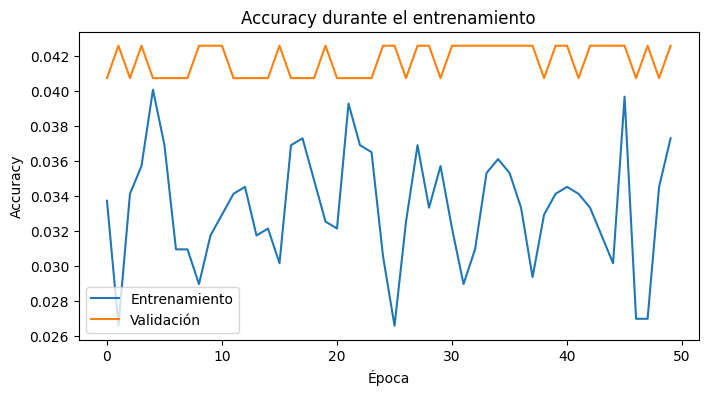

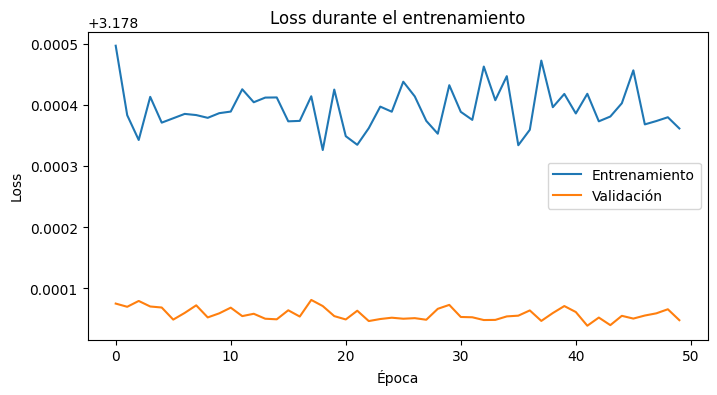

In [28]:
import matplotlib.pyplot as plt

# Accuracy
plt.figure(figsize=(8,4))
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Accuracy durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Loss durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()
plt.show()